In [1]:
import ROOT

Welcome to JupyROOT 6.26/04


In [16]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import beta

In [3]:
d = ROOT.RDataFrame("TimedTrackStorageW", "run7232_merged_energyest.root")

In [4]:
import uproot
file = uproot.open("run7232_merged_energyest.root")

In [5]:
tree = file["TimedTrackStorageW"]
tree.keys()

['M1',
 'S3',
 'S5',
 'S8',
 'S10',
 'S15',
 'run',
 'subrun',
 'event',
 'beamInfo',
 'beamInfo/beamGateSimStart',
 'beamInfo/beamGateDuration',
 'beamInfo/beamGateType',
 'triggerInfo',
 'triggerInfo/beamType',
 'triggerInfo/triggerTime',
 'triggerInfo/beamGateTime',
 'triggerInfo/triggerID',
 'triggerInfo/gateID',
 'selTracks',
 'selTracks/trackID',
 'selTracks/t0',
 'selTracks/start_x',
 'selTracks/start_y',
 'selTracks/start_z',
 'selTracks/end_x',
 'selTracks/end_y',
 'selTracks/end_z',
 'selTracks/length',
 'selTracks/energy',
 'selTracks/dir_x',
 'selTracks/dir_y',
 'selTracks/dir_z',
 'selFlashes',
 'selFlashes/selFlashes.flash_id',
 'selFlashes/selFlashes.sum_pe',
 'selFlashes/selFlashes.flash_time',
 'selFlashes/selFlashes.flash_x',
 'selFlashes/selFlashes.flash_y',
 'selFlashes/selFlashes.flash_z',
 'selFlashes/selFlashes.diff_flash_t0']

In [6]:
pandas.set_option('display.max_columns', None)

In [7]:
df = tree.arrays(library="pd")

In [8]:
df

(M1, time)  (M1, gateStart)  (M1, fired)    (S3, time)  \
entry  subentry                                                             
3      0        -1.844674e+16         1077.546        False -1.844674e+16   
       1        -1.844674e+16         1077.546        False -1.844674e+16   
4      0        -1.844674e+16         1627.280        False -1.844674e+16   
       1        -1.844674e+16         1627.280        False -1.844674e+16   
5      0        -1.844674e+16         1401.338        False -1.844674e+16   
...                       ...              ...          ...           ...   
373469 1         1.542394e+03         1532.180         True  1.542398e+03   
       2         1.542394e+03         1532.180         True  1.542398e+03   
373470 0        -1.844674e+16          596.834        False -1.844674e+16   
       1        -1.844674e+16          596.834        False -1.844674e+16   
       2        -1.844674e+16          596.834        False -1.844674e+16   

                 (S3, gateStart)  (S3, fired)    (S5, time)  (S5, gateStart)  \
entry  subentry                                                                
3      0                1077.546        False -1.844674e+16         1077.546   
       1                1077.546        False -1.844674e+16         1077.546   
4      0                1627.280        False -1.844674e+16         1627.280   
       1                1627.280        False -1.844674e+16         1627.280   
5      0                1401.338        False -1.844674e+16         1401.338   
...                          ...          ...           ...              ...   
373469 1                1532.180         True  1.542410e+03         1532.180   
       2                1532.180         True  1.542410e+03         1532.180   
373470 0                 596.834        False -1.844674e+16          596.834   
       1                 596.834        False -1.844674e+16          596.834   
       2                 596.834        False -1.844674e+16          596.834   

                 (S5, fired)    (S8, time)  (S8, gateStart)  (S8, fired)  \
entry  subentry                                                            
3      0               False -1.844674e+16         1077.546        False   
       1               False -1.844674e+16         1077.546        False   
4      0               False -1.844674e+16         1627.280        False   
       1               False -1.844674e+16         1627.280        False   
5      0               False -1.844674e+16         1401.338        False   
...                      ...           ...              ...          ...   
373469 1                True  1.547380e+03         1532.180         True   
       2                True  1.547380e+03         1532.180         True   
373470 0               False -1.844674e+16          596.834        False   
       1               False -1.844674e+16          596.834        False   
       2               False -1.844674e+16          596.834        False   

                  (S10, time)  (S10, gateStart)  (S10, fired)   (S15, time)  \
entry  subentry                                                               
3      0        -1.844674e+16          1077.546         False -1.844674e+16   
       1        -1.844674e+16          1077.546         False -1.844674e+16   
4      0        -1.844674e+16          1627.280         False -1.844674e+16   
       1        -1.844674e+16          1627.280         False -1.844674e+16   
5      0        -1.844674e+16          1401.338         False -1.844674e+16   
...                       ...               ...           ...           ...   
373469 1         1.547384e+03          1532.180          True  1.547386e+03   
       2         1.547384e+03          1532.180          True  1.547386e+03   
373470 0        -1.844674e+16           596.834         False -1.844674e+16   
       1        -1.844674e+16           596.834         False -1.844674e+16   
       2        -1.844674e+16          

In [10]:
len(df)
len(df[('event', '')].unique())

76667

# 6/28 To-do:
1. how many tracks do we have? ✅

2. change column names ✅

3. make histograms of total number of tracks per length & ones that triggered/didn't ✅

4. draw an efficiency vs track length plot ✅
    - efficiency is w/ triggered data
    - F in denom, T in num & denom
    - don't hardcode trigger settings
    - Error bars:
        - binomial dist for errors
        - cases with only 1 track / 100% efficiency handle error separately
        - root TEfficiency for errors? consider
        
~~Problem~~: Why are my efficiencies all so small (<0.2)? Do I need to only count those tracks that occur within some trigger time? What variable is that? Choosing only t0 within -70 to 70 gives efficiencies ~50% for all lengths, so that doesn't seem like the right choice

Efficiency formula:

e = $\frac{\textrm{(TPC tracks with CRT hit and with light info)} × \textrm{(which would fire the trigger)}}{\textrm{(TPC tracks with CRT hit and with light info)}}$ = $\frac{\textrm{Track in df_time that triggered}}{\textrm{Track in df_time (triggered or not)}}$

df_time is the variation of the original dataset that eliminates the subentries column (and hence duplicate rows from the same event) and only keeps rows with t0 between -55 and 55 (for this minimum bias run with 150 µs of recording time, and so these are the only possible times during which triggering can happen, adding some buffer). 

In [11]:
# renames columns from default name given by uproot
def colRename(col_name): 
    col_name = str(col_name)
    col_name = col_name.replace("'", "")
    col_name = col_name.replace("(", "")
    col_name = col_name.replace(")", "")
    if "." in col_name:
        col_name = col_name.split(".", 1)[1]
    x = col_name.split(", ")
    if x[1]=='':
        return x[0]
    else:
        return x[0] + "_" + x[1]

In [12]:
df = df.rename(colRename, axis='columns')

In [13]:
# all rows with subentry = 0 from original df
# gets rid of double counting from flashes
df_u = df.xs(0, level='subentry')
df_u

,M1_time,M1_gateStart,M1_fired,S3_time,S3_gateStart,S3_fired,S5_time,S5_gateStart,S5_fired,S8_time,S8_gateStart,S8_fired,S10_time,S10_gateStart,S10_fired,S15_time,S15_gateStart,S15_fired,run,subrun,event,beamGateSimStart,beamGateDuration,beamGateType,beamType,triggerTime,beamGateTime,triggerID,gateID,trackID,t0,start_x,start_y,start_z,end_x,end_y,end_z,length,energy,dir_x,dir_y,dir_z,flash_id,sum_pe,flash_time,flash_x,flash_y,flash_z,diff_flash_t0
entry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,-1.844674e+16,1077.546,False,-1.844674e+16,1077.546,False,-1.844674e+16,1077.546,False,-1.844674e+16,1077.546,False,-1.844674e+16,1077.546,False,-1.844674e+16,1077.546,False,7232,1,18921,18446744073709551464,9500.0,2,0,1638315403847442656,1638315403847442504,18921,18921,0,-402.453003,179.075394,132.394302,-410.087708,301.137482,-181.064072,-123.377594,442.071564,979.455322,0.237779,-0.721943,0.649815,0,38595.585938,12.528,inf,-19.994398,433.058289,414.980988
4,-1.844674e+16,1627.280,False,-1.844674e+16,1627.280,False,-1.844674e+16,1627.280,False,-1.844674e+16,1627.280,False,-1.844674e+16,1627.280,False,-1.844674e+16,1627.280,False,7232,1,18921,18446744073709551464,9500.0,2,0,1638315403847442656,1638315403847442504,18921,18921,1,147.281631,106.586220,133.307190,735.590271,233.256378,-178.660583,584.718567,369.017120,1258.024658,0.323982,-0.860372,-0.393442,0,38595.585938,12.528,inf,-19.994398,433.058289,-134.753632
5,-1.844674e+16,1401.338,False,-1.844674e+16,1401.338,False,-1.844674e+16,1401.338,False,-1.844674e+16,1401.338,False,-1.844674e+16,1401.338,False,-1.844674e+16,1401.338,False,7232,1,18921,18446744073709551464,9500.0,2,0,1638315403847442656,1638315403847442504,18921,18921,2,-78.661186,199.367172,132.410782,-532.570435,359.902405,-179.630173,-545.943665,351.555634,855.945374,0.453890,-0.889072,-0.059448,0,38595.585938,12.528,inf,-19.994398,433.058289,91.189186
6,-1.844674e+16,1749.658,False,-1.844674e+16,1749.658,False,-1.844674e+16,1749.658,False,-1.844674e+16,1749.658,False,-1.844674e+16,1749.658,False,-1.844674e+16,1749.658,False,7232,1,18921,18446744073709551464,9500.0,2,0,1638315403847442656,1638315403847442504,18921,18921,3,269.658173,201.794250,132.375671,-40.809399,278.079224,-180.586456,-108.216133,329.163635,771.415833,0.218751,-0.960482,-0.172112,0,38595.585938,12.528,inf,-19.994398,433.058289,-257.130188
7,1.498072e+03,1496.388,True,1.512544e+03,1496.388,True,1.512548e+03,1496.388,True,1.512550e+03,1496.388,True,1.512552e+03,1496.388,True,1.512554e+03,1496.388,True,7232,1,18921,18446744073709551464,9500.0,2,0,1638315403847442656,1638315403847442504,18921,18921,4,16.389055,359.597809,93.397507,462.454590,92.746231,-180.188019,471.763763,382.340851,978.107239,-0.690430,-0.723092,0.021088,0,38595.585938,12.528,inf,-19.994398,433.058289,-3.861055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373463,-1.844674e+16,1044.302,False,-1.844674e+16,1044.302,False,-1.844674e+16,1044.302,False,-1.844674e+16,1044.302,False,-1.844674e+16,1044.302,False,-1.844674e+16,1044.302,False,7232,1,92639,18446744073709551480,1600.0,1,0,1638331649158503024,1638331649158502888,92639,92639,4,-435.697784,343.622681,1.493801,-250.529327,202.452774,-180.004013,-250.353165,230.069305,550.531555,-0.605281,-0.795844,0.016357,0,30200.671875,-15.892,inf,-40.012356,-668.583374,419.805786
373464,-1.844674e+16,672.372,False,-1.844674e+16,672.372,False,-1.844674e+16,672.372,False,-1.844674e+16,672.372,False,-1.844674e+16,672.372,False,-1.844674e+16,672.372,False,7232,1,92639,18446744073709551480,1600.0,1,0,1638331649158503024,1638331649158502888,92639,92639,7,-807.627747,220.914871,-178.982040,-479.314026,135.668640,-67.901451,-441.885132,145.091934,390.672394,-0.554351,0.766433,0.324462,0,30200.671875,-15.892,inf,-40.012356,-668.583374,791.735779
373465,-1.844674e+16,280.072,False,-1.844674e+16,2

In [14]:
print(len(df_u)) # actual number of events
df_time = df_u[df_u["t0"].between(-55, 55)]
print(len(df_time))

316825
23899


<BarContainer object of 10 artists>

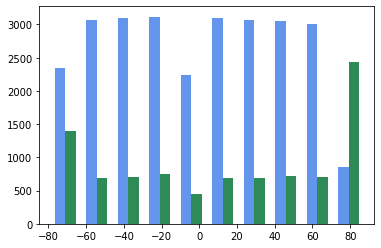

In [15]:
# make histogram of triggered v. non-triggered counts by length bins
t_type = "S15" # trigger type chosen for this histogram
label = t_type + "_fired"
trig = df_u[df_u[label] == True]
notTrig = df_u[df_u[label] == False]

var = "t0"
fig, ax = plt.subplots()

trig_heights, trig_bins = np.histogram(trig[var])
notTrig_heights, notTrig_bins = np.histogram(notTrig[var], bins=trig_bins)


width = (trig_bins[1] - trig_bins[0])/3

ax.bar(trig_bins[:-1], trig_heights, width=width, facecolor='cornflowerblue')
ax.bar(notTrig_bins[:-1]+width, notTrig_heights, width=width, facecolor='seagreen')

In [201]:
# make efficiency plot triggering by length bins
type = ["M1", "S3", "S5", "S8", "S10", "S15"]
color = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
#type = ["S3", "S5", "S10"]

# only count events within the interval where data is being collected (otherwise the trigger will obviously not fire)
df_time = df_u[df_u["t0"].between(-55, 55)]

In [202]:
# "exact" Clopper-Pearson interval inspired by TEfficiency documentation
conf = 0.9

# gets lower errorbar endpoint
def binom_int_low(num,den, confint=conf):
    quant = (1 - confint)/ 2.
    low = beta.ppf(quant, num, den - num + 1)
    return np.nan_to_num(low)

# gets upper errorbar endpoint
def binom_int_high(num,den, confint=conf):
    quant = (1 - confint)/ 2.
    high = beta.ppf(1 - quant, num + 1, den - num)
    return np.where(np.isnan(high), 1, high)

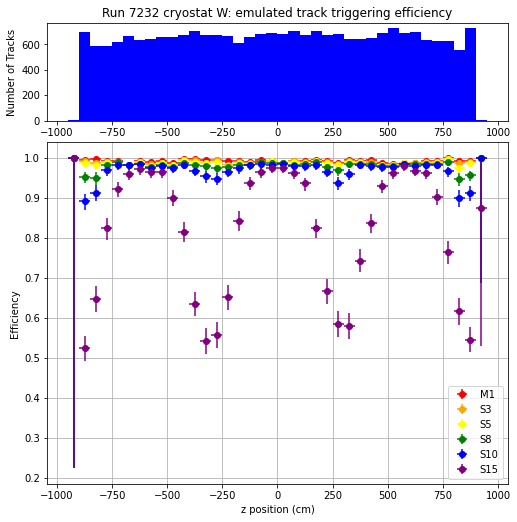

In [264]:
# set up figure and panels
fig = plt.figure(figsize=(8, 8))

gs = fig.add_gridspec(2, 1, height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.2, hspace=0.1)

ax = fig.add_subplot(gs[1, 0])
ax_hist = fig.add_subplot(gs[0, 0], sharex=ax)

var = "start_z"
bin_size = 50

# maximum length, rounded up to the nearest bin size
max_val = max(df_time[var])
max_val = int(np.ceil(max_val/bin_size)*bin_size)
min_val = min(df_time[var])
min_val = int(np.floor(min_val/bin_size)*bin_size)

bin_arr = np.arange(min_val, max_val, bin_size)

# for length, to emulate Jacob's plot
#bin_arr = [0, 100, 200, 300, 400, 500, 600, 800] 
#bin_size = np.append(np.ediff1d(bin_arr),200) 
    
for t in range(0, len(type)):
    t_type = type[t] # trigger type chosen for this histogram
    label = t_type + "_fired"
    trig = df_time[df_time[label] == True]
    notTrig = df_time[df_time[label] == False]
    
    
    # counts of triggered and not triggered events in the bin
    bin_trig = [len(trig[(bin_arr[i]<=trig[var]) & (trig[var]<bin_arr[i]+bin_size)]) for i in range(len(bin_arr))]
    bin_notTrig = [len(notTrig[(bin_arr[i]<=notTrig[var]) & (notTrig[var]<bin_arr[i]+bin_size)]) for i in range(len(bin_arr))]

    # total number of events in the bin
    bin_tot = np.add(bin_trig, bin_notTrig)
    # adjust sizes of triggered, not triggered, and bin lists to eliminate bins with 0 events
    bin_trig = [bin_trig[i] for i in range(len(bin_arr)) if bin_tot[i]!=0]
    bin_notTrig = [bin_notTrig[i] for i in range(len(bin_arr)) if bin_tot[i]!=0]
    bin_arr = [bin_arr[i] for i in range(len(bin_arr)) if bin_tot[i]!=0]
    
    # compute efficiency for each bin
    eff_arr = np.divide(bin_trig, (np.add(bin_trig, bin_notTrig)))
   
    # compute errors corresponding to efficiency values using the exact Clopper-Pearson method
    # use asymmetric error so that the error bars don't extend above 1
    low_CI = [binom_int_low(bin_trig[i], bin_trig[i] + bin_notTrig[i]) for i in range(len(bin_trig))]
    high_CI = [binom_int_high(bin_trig[i], bin_trig[i] + bin_notTrig[i]) for i in range(len(bin_trig))]
    high_yerr_arr = np.subtract(high_CI, eff_arr)
    low_yerr_arr = np.subtract(eff_arr, low_CI)
    asymm_err = [low_yerr_arr, high_yerr_arr]
    
    # plot the error bars
    ax.errorbar([(i+bin_size/2) for i in bin_arr], eff_arr, xerr = bin_size/2, yerr = asymm_err, label = t_type, fmt='o', color=color[t])
    
# scatterplot axes labels and legend
ax.legend(loc="lower right")
ax.set_xlabel("z position (cm)")
ax.set_ylabel("Efficiency")

# plot title
plt.title("Run 7232 cryostat W: emulated track triggering efficiency")

# plot the histogram of counts
ax_hist.bar([(i+bin_size/2) for i in bin_arr], bin_tot, width=bin_size, color=color[4])
ax_hist.set_ylabel("Number of Tracks")
ax.grid()

# show and save the figure
plt.show()
#plt.savefig('e length plots/efficiency_start_x_7232mer_0.9CI.pdf') # can powerpoint import pdf?

1.0732389688491821 412.0295715332031
0
316825


Text(0.5, 1.0, 'Run 7232 cryostat W: emulated track triggering time delay')

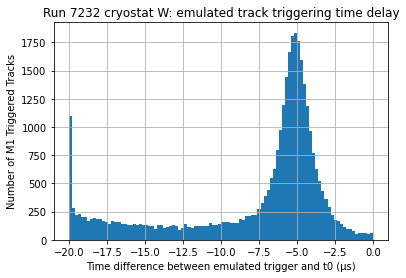

In [314]:
var = 'end_x'
print(min(df_u[var]), max(df_u[var]))
print(len(df_u[(500<=df_u[var]) & (df_u[var]<=max(df_u[var]))]))
print(len(df_u[var]))


fig, ax = plt.subplots()

df_M1 = df_u[df_u['M1_fired']]
diff = df_M1['M1_time']-df_M1['t0']-1500 # 20 microsecond range, emulation only considers 20 us around track time for trigger
# electronics time starts 1500 us before trigger, fixed
# t0 time bigger, time alignment not great
# evaluate trigger before t0 because of time offsets
# np.mean(diff) # avg delay b/w
diff.hist(bins=100)

ax.set_xlabel("Time difference between emulated trigger and t0")
ax.set_ylabel("Number of M1 Triggered Tracks")

# plot title
plt.title("Run 7232 cryostat W: emulated track triggering efficiency")

1.0732389688491821 412.0295715332031
0
316825


Text(0.5, 1.0, 'Run 7232 cryostat W: track end x-positions')

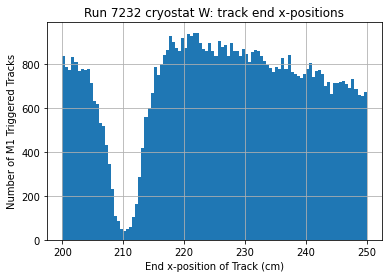

In [319]:
var = 'end_x'
print(min(df_u[var]), max(df_u[var]))
print(len(df_u[(500<=df_u[var]) & (df_u[var]<=max(df_u[var]))]))
print(len(df_u[var]))


fig, ax = plt.subplots()

arr = df_u[var]
arr.hist(bins=100, range=(200, 250))

ax.set_xlabel("End x-position of Track (cm)")
ax.set_ylabel("Number of M1 Triggered Tracks")

# plot title
plt.title("Run 7232 cryostat W: track end x-positions")

138.22275388621478


Text(0.5, 1.0, 'Run 7232 cryostat W: difference between trigger and beamgate times')

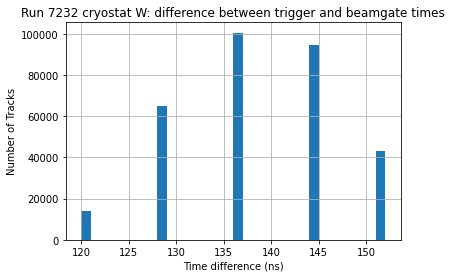

In [307]:
fig, ax = plt.subplots()
diff = df_u['triggerTime']-df_u['beamGateTime']
diff.hist(bins=32)
print(np.mean(diff))
ax.set_ylabel("Number of Tracks")
ax.set_xlabel("Time difference (ns)")
ax.set_title("Run 7232 cryostat W: difference between trigger and beamgate times")

1638311234.6799462
0.000355328
22237.807468288


Text(0.5, 1.0, 'Run 7232 cryostat W: emulated track triggering efficiency')

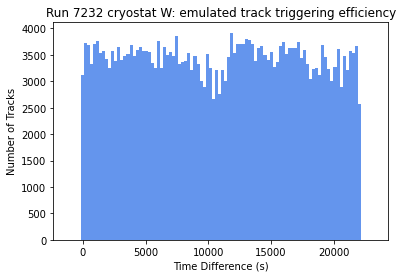

In [284]:
# histogram of difference between triggerTime and t0 for all tracks
# not sure if I'm doing this right...

var1 = "triggerTime" # in nanoseconds
var2 = "t0" # in microseconds
fig, ax = plt.subplots()
print(min(df_u[var1])*1e-9)
diff = (df_u[var1]-(df_u[var2]*1e3)-min(df_u[var1]))*1e-9
print(min(diff))
print(max(diff))
heights, bins = np.histogram(diff, bins=100, range=(-1e3, max(diff)+1e3))

width = (bins[1] - bins[0])

ax.bar(bins[:-1], heights, width=width, facecolor='cornflowerblue')
ax.set_xlabel("Time Difference (s)")
ax.set_ylabel("Number of Tracks")
plt.title("Run 7232 cryostat W: emulated track triggering efficiency")

In [36]:
bw = df_time[df_time['length'].between(0, 100)]
bwm1 = len(bw[bw["M1_fired"]==False])
bws3 = len(bw[bw["S3_fired"]==False])
bws5 = len(bw[bw["S5_fired"]==False])
bws8 = len(bw[bw["S8_fired"]==False])
bws10 = len(bw[bw["S10_fired"]==False])
bws15 = len(bw[bw["S15_fired"]==False])
print(bwm1, bws3, bws5, bws8, bws10, bws15)

26 45 76 169 212 285


# 6/29 To-do:
1. offset between trigger time and track time? emulated trigger centers on track of time ✅
    - imposing a bias, should find trigger time is never more than so much away from time of track
    - not sure I did it right - got a range of about 1 million seconds which seems like a lot...?
2. efficiency v. other variables ✅
    - energy is weird though - there's a ton of very low energy tracks and very few high energy ones, spread over a very large range from about 10kJ to about 1.5MJ - I chose to only consider up to 10kJ which I think captures most of the tracks - 23427 out of 23899 events are captured in the plot.
3. compare with jacob's plot ✅
    - not sure exactly what statistical model jacob used but the recommended Clopper-Pearson interval got me pretty close
4. check root documentation for error inspiration for when error is 0 - TEfficiency documentation ✅
    - clopper-pearson exact interval was recommended so I used that
5. store data in git repository ✅
6. include histogram of number of tracks in each bin ✅

# 6/30 To-do:
1. consider trigger efficiency as a function of x ✅
    - tried start and end x, they look really similar
    - both are bimodal, highest efficiency around x=100 & x=300
2. plot trigger efficiency as a function of z ✅
    - overall more efficient closer to z=0
3. plot trigger efficiency as function of the balance of energy deposition on the two sides of the cathode - tomorrow
    - what data to use?
    - use start + end positions of track & assume straight line - then, need to know cathode x position
        - then assume constant dE/dx ≈ 2.2 for energy deposition estimate on either side of cathode
    - use ratio of energy deposition $\frac{\textrm{Energy deposition of track section with } x > x_\textrm{cathode}}{\textrm{Energy deposition of track section with } x < x_\textrm{cathode}}$ as variable?
4. prepare a first report of the work I have done so far in the form of slides for a presentation -- the standard form includes motivation, methodology and results ✅
5. clarify offset in trigger time & t0 from yesterday - weird results ✅
    - figure out first peak in M1_time - t0 histogram

# 7/1 To-do:
1. plot trigger efficiency as function of the balance of energy deposition on the two sides of the cathode (simplified version to start)
    - don't have dQ/dx data and cathode intersection location not yet in the tree
    - use ratio of distance of track endpoints from cathode $\frac{\textrm{Distance from cathode of track endpoint with } x > x_\textrm{cathode}}{\textrm{Distance from cathode of track endpoint with } x < x_\textrm{cathode}}$ as variable
        - get $x_\textrm{cathode}$ from the distribution of x - look at histogram
        - if mixing east and west cryostats (which I wasn't) then remember there are two different cathodes
2. add this exploration to the presentation